In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# Find all JSON result files
result_files_dir = 'Server_Data/Eval_Batch_1'
# Find all JSON files in the subdirectories of the result_files_dir
result_files = []
for root, dirs, files in os.walk(result_files_dir):
    for file in files:
        if file.endswith('.json'):
            result_files.append(os.path.join(root, file))

print(f"Found {len(result_files)} JSON files in {result_files_dir} and its subdirectories")


Found 50 JSON files in Server_Data/Eval_Batch_1 and its subdirectories


Processed 50 files successfully

Timing Statistics (in seconds):
       total_time  moge_time   gpt_time  total_masking_time  avg_masking_time
count   50.000000  50.000000  50.000000           50.000000         50.000000
mean    23.014696   2.071829  14.644834            3.028447          0.894432
std      5.901199   2.443201   4.297578            1.338362          0.158360
min     11.955082   0.944032   8.604484            0.000000          0.000000
25%     19.423038   1.296651  11.972504            2.463901          0.837858
50%     23.104513   1.498806  13.960863            3.063849          0.903617
75%     25.792759   1.621439  16.155238            3.808984          0.955182
max     39.002994  11.957485  28.429963            5.569148          1.179253

Success Rate Statistics:
count     50.000000
mean      93.157143
std       17.902586
min       33.333333
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: success_rate, dtype: float64


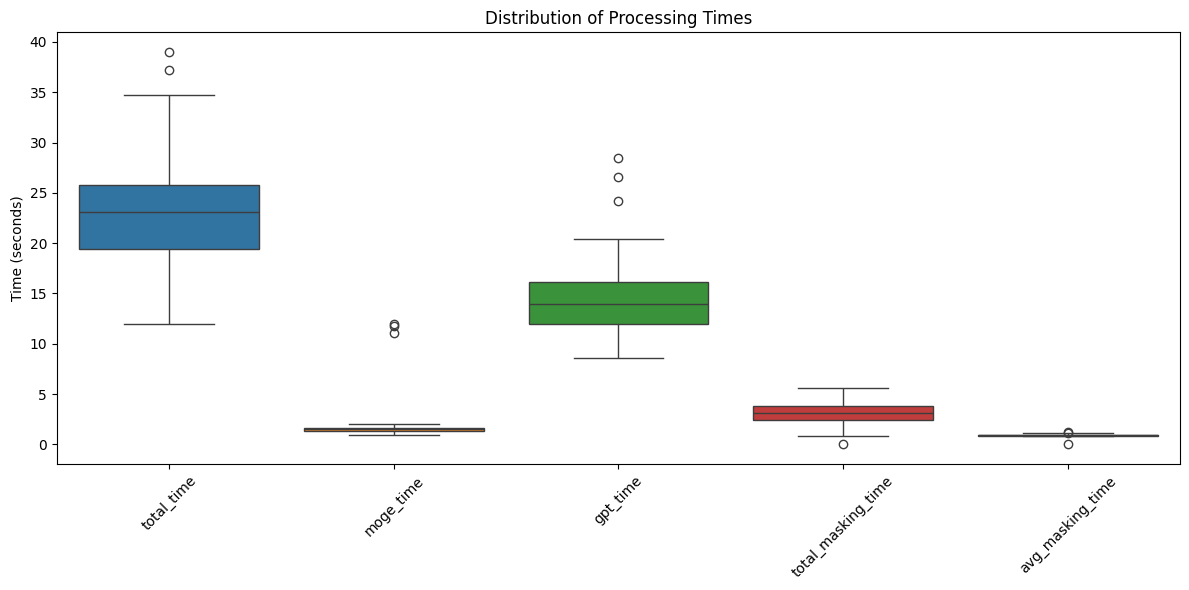

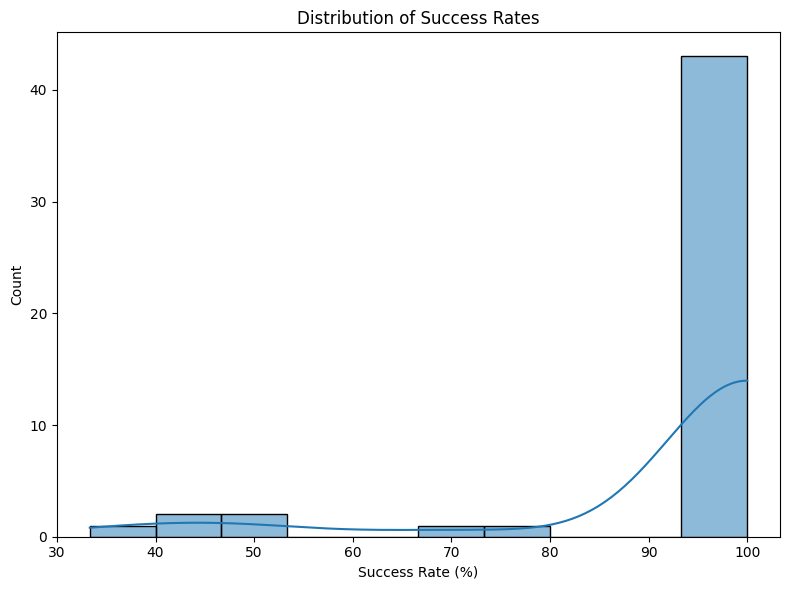

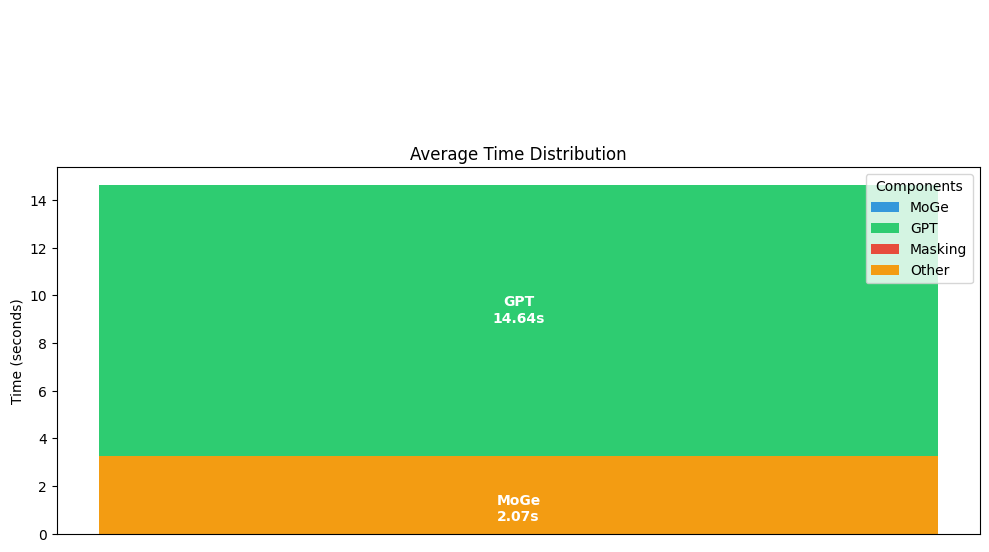

In [ ]:
# Function to extract data from JSON files
def extract_data_from_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Extract file ID from path
    file_id = os.path.basename(file_path).split('_processing_results.json')[0]
    
    # Initialize data dictionary
    result = {
        'file_id': file_id,
        'total_time': None,
        'moge_time': None,
        'gpt_time': None,
        'total_masking_time': 0,
        'avg_masking_time': 0,
        'num_visual_codings': 0,
        'success_count': 0,
        'error_count': 0
    }
    
    # Extract timing information
    if 'timing' in data:
        result['total_time'] = data['timing'].get('total_time')
        result['moge_time'] = data['timing'].get('moge_time')
        result['gpt_time'] = data['timing'].get('gpt_time')
    
    # Process visual coding results
    if 'processing_results' in data:
        result['num_visual_codings'] = len(data['processing_results'])
        masking_times = []
        
        for vc_result in data['processing_results']:
            # Count successes and errors
            if vc_result.get('status') == 'success':
                result['success_count'] += 1
            elif vc_result.get('status') == 'error':
                result['error_count'] += 1
            
            # Extract masking times if available
            if 'masking_time' in vc_result:
                masking_time = vc_result['masking_time']
                result['total_masking_time'] += masking_time
                masking_times.append(masking_time)
        
        # Calculate average masking time
        if masking_times:
            result['avg_masking_time'] = sum(masking_times) / len(masking_times)
    
    return result

# Process all JSON files and create a DataFrame
all_data = []
for file_path in result_files:
    try:
        file_data = extract_data_from_json(file_path)
        all_data.append(file_data)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Create DataFrame from collected data
df = pd.DataFrame(all_data)

# Display basic statistics
print(f"Processed {len(df)} files successfully")
print("\nTiming Statistics (in seconds):")
print(df[['total_time', 'moge_time', 'gpt_time', 'total_masking_time', 'avg_masking_time']].describe())

# Calculate success rate
df['success_rate'] = df['success_count'] / df['num_visual_codings'] * 100
print("\nSuccess Rate Statistics:")
print(df['success_rate'].describe())

# Visualize timing distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['total_time', 'moge_time', 'gpt_time', 'total_masking_time', 'avg_masking_time']])
plt.title('Distribution of Processing Times')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize success rate distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['success_rate'], bins=10, kde=True)
plt.title('Distribution of Success Rates')
plt.xlabel('Success Rate (%)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


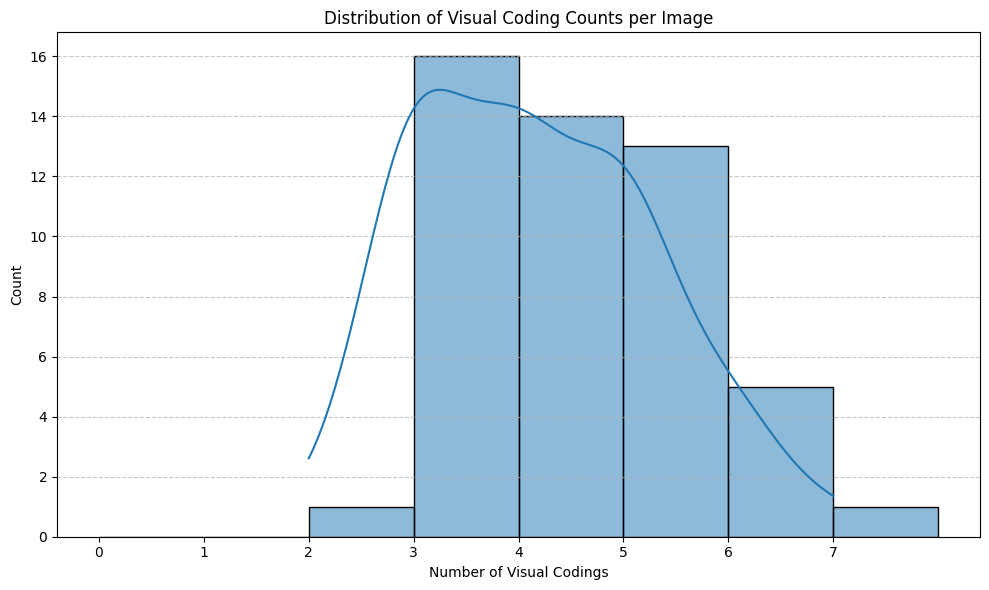


Visual Coding Count Statistics:
count    50.000000
mean      4.160000
std       1.113186
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       7.000000
Name: num_visual_codings, dtype: float64

Most common number of visual codings per image: 3

Percentage of images with each visual coding count:
3 visual codings: 32.00%
4 visual codings: 28.00%
5 visual codings: 26.00%
6 visual codings: 10.00%
7 visual codings: 2.00%
2 visual codings: 2.00%


In [6]:
# Analyze distribution of visual coding counts per image
plt.figure(figsize=(10, 6))
sns.histplot(df['num_visual_codings'], bins=range(0, df['num_visual_codings'].max() + 2), kde=True)
plt.title('Distribution of Visual Coding Counts per Image')
plt.xlabel('Number of Visual Codings')
plt.ylabel('Count')
plt.xticks(range(0, df['num_visual_codings'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate statistics about visual coding counts
print("\nVisual Coding Count Statistics:")
print(df['num_visual_codings'].describe())

# Calculate the most common number of visual codings
most_common = df['num_visual_codings'].mode().values[0]
print(f"\nMost common number of visual codings per image: {most_common}")

# Calculate percentage of images with different visual coding counts
count_percentages = df['num_visual_codings'].value_counts(normalize=True) * 100
print("\nPercentage of images with each visual coding count:")
for count, percentage in count_percentages.items():
    print(f"{count} visual codings: {percentage:.2f}%")


Unknown visual coding type for {'visual_coding': {'name': 'Airplane Wing Skeleton', 'description': 'Extracts the skeleton structure of the airplane wing for a skeletal representation.', 'visual_code': ['MASK_0=Text2Mask(prompt = "the airplane wing")', 'MESH_0=Mask2Mesh(mask = MASK_0)', 'SKELETON_0=SkeletonExtraction(mask = MASK_0)']}, 'status': 'success', 'processing_time': 0.38901305198669434, 'masking_time': 0.798525333404541}
Unknown visual coding type for {'visual_coding': {'name': 'Palm Tree Skeleton', 'description': 'Extracts the skeleton of the palm tree for a detailed representation.', 'visual_code': ['MASK_0=Text2Mask(prompt = "the palm tree")', 'MESH_0=Mask2Mesh(mask = MASK_0)', 'SKELETON_0=SkeletonExtraction(mask = MASK_0)']}, 'status': 'success', 'processing_time': 0.3775010108947754, 'masking_time': 0.7705018520355225}
Unknown visual coding type for {'visual_coding': {'name': 'Power Line', 'description': 'Extracts the power line structure to create a line coordinate system

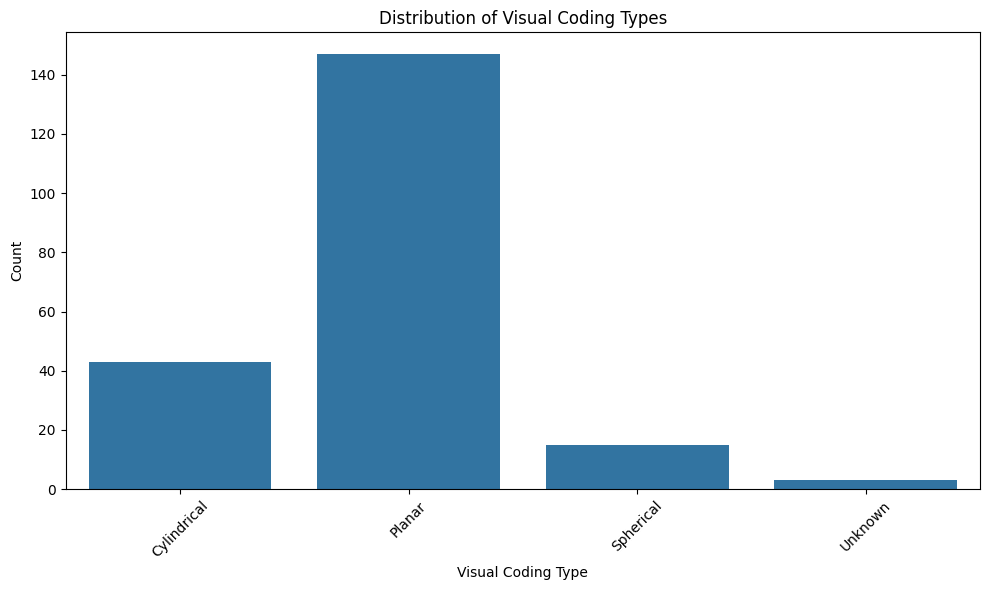

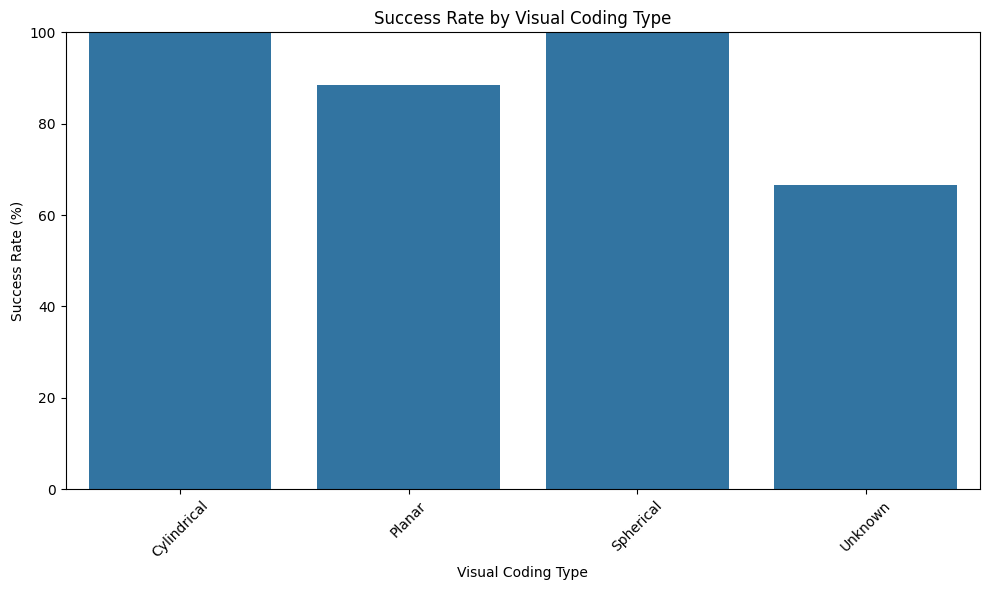

In [ ]:
# Analyze visual coding types and success rates
import json
import re
from collections import Counter

# Function to load JSON data from file paths
def load_json_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Initialize containers for analysis
all_visual_codings = []
vc_types = []
vc_success = []
vc_failures = []
overall_success_count = 0
overall_total_count = 0

# Process each result file
for file_path in result_files:
    try:
        # Load the JSON data
        data = load_json_data(file_path)
        
        # Extract processing results
        if 'processing_results' in data:
            processing_results = data['processing_results']
            
            # Process each visual coding
            for result in processing_results:
                overall_total_count += 1
                
                if 'visual_coding' in result:
                    vc = result['visual_coding']
                    all_visual_codings.append(vc)
                    
                    # Determine the type of visual coding
                    vc_type = "Unknown"
                    if 'visual_code' in vc:
                        code_str = ' '.join(vc['visual_code'])
                        if 'PLANAR' in code_str:
                            vc_type = "Planar"
                        elif 'CYLINDRICAL' in code_str:
                            vc_type = "Cylindrical"
                        elif 'SPHERICAL' in code_str:
                            vc_type = "Spherical"
                    if vc_type == "Unknown":
                        print(f"Unknown visual coding type for {result}")
                    vc_types.append(vc_type)
                    
                    # Track success/failure
                    if result['status'] == 'success':
                        overall_success_count += 1
                        vc_success.append((vc_type, True))
                    else:
                        vc_success.append((vc_type, False))
                        if 'error_message' in result:
                            vc_failures.append(result['error_message'])
    except Exception as e:
        print(f"Error processing file {file_path}: {str(e)}")

# Calculate overall success rate
overall_success_rate = (overall_success_count / overall_total_count * 100) if overall_total_count > 0 else 0

# Calculate success rate by type
type_counts = Counter(vc_types)
type_success_counts = Counter([t for t, s in vc_success if s])
type_success_rates = {t: (type_success_counts[t] / count * 100) if count > 0 else 0 
                     for t, count in type_counts.items()}

# Analyze failure reasons
failure_reasons = Counter(vc_failures)

# Display results
print("Visual Coding Type Distribution:")
for vc_type, count in type_counts.items():
    print(f"{vc_type}: {count} ({count/len(vc_types)*100:.2f}%)")

print("\nSuccess Rate by Visual Coding Type:")
for vc_type, rate in type_success_rates.items():
    print(f"{vc_type}: {rate:.2f}%")

print(f"\nOverall Success Rate: {overall_success_rate:.2f}%")

print("\nTop Failure Reasons:")
for reason, count in failure_reasons.most_common(5):
    print(f"- {reason}: {count} occurrences")

# Visualize the distribution of visual coding types
plt.figure(figsize=(10, 6))
sns.countplot(x=vc_types)
plt.title('Distribution of Visual Coding Types')
plt.xlabel('Visual Coding Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize success rates by type
success_rate_df = pd.DataFrame({
    'Type': list(type_success_rates.keys()),
    'Success Rate (%)': list(type_success_rates.values())
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Success Rate (%)', data=success_rate_df)
plt.title('Success Rate by Visual Coding Type')
plt.xlabel('Visual Coding Type')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In [21]:
vc_failures

['No face landmarks detected',
 'No face landmarks detected',
 'No face landmarks detected',
 'No face landmarks detected',
 "Unexpected compound variable encountered! PLANE doesn't support median as suffix",
 "Unexpected compound variable encountered! PLANE doesn't support median as suffix",
 "Unexpected compound variable encountered! PLANE doesn't support frontal as suffix",
 "Unexpected compound variable encountered! PLANE doesn't support frontal as suffix",
 "Unexpected compound variable encountered! PLANE doesn't support median as suffix",
 "'Skeleton' object has no attribute 'positions_3d'",
 "'Skeleton' object has no attribute 'positions_3d'",
 'No face landmarks detected',
 'No face landmarks detected',
 "'Skeleton' object has no attribute 'positions_3d'",
 'No face landmarks detected',
 'Unknown function name: Linear',
 'No face landmarks detected',
 'No face landmarks detected']

In [17]:
result_files

['Server_Data/Eval_Batch_1\\064a89b3-cd2e-4c51-8c2a-829e1c094298\\064a89b3-cd2e-4c51-8c2a-829e1c094298_processing_results.json',
 'Server_Data/Eval_Batch_1\\06b6e3d3-d198-42a7-9c88-0e19e68eaeeb\\06b6e3d3-d198-42a7-9c88-0e19e68eaeeb_processing_results.json',
 'Server_Data/Eval_Batch_1\\07aefe53-a944-4fca-a363-59637bb6c415\\07aefe53-a944-4fca-a363-59637bb6c415_processing_results.json',
 'Server_Data/Eval_Batch_1\\0b9f98c8-8496-44e5-a1b8-91cb1f23daf9\\0b9f98c8-8496-44e5-a1b8-91cb1f23daf9_processing_results.json',
 'Server_Data/Eval_Batch_1\\0bea7e7b-cb43-4ef6-8347-9488425c7075\\0bea7e7b-cb43-4ef6-8347-9488425c7075_processing_results.json',
 'Server_Data/Eval_Batch_1\\0d9f21f6-c34e-443f-9871-d4de5f823052\\0d9f21f6-c34e-443f-9871-d4de5f823052_processing_results.json',
 'Server_Data/Eval_Batch_1\\1bb573a0-12f0-4693-b306-cec7bd4ee41c\\1bb573a0-12f0-4693-b306-cec7bd4ee41c_processing_results.json',
 'Server_Data/Eval_Batch_1\\208c3b69-8109-4447-a215-6c94555c2c7a\\208c3b69-8109-4447-a215-6c94555